In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Complete 1D model

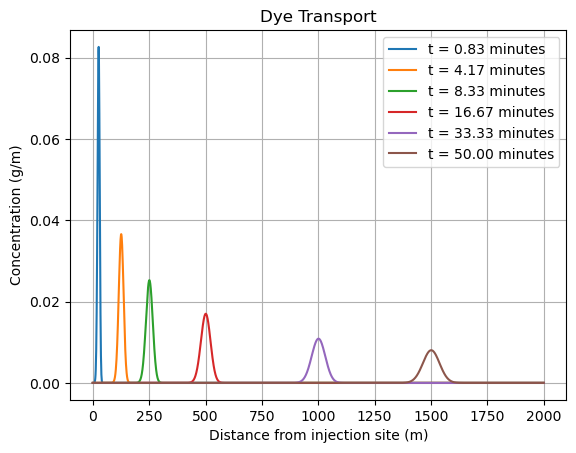

In [3]:
# Parameters
shift = int(100) # Injection at x[shift] instead of x[0]
D = 0.1  # Diffusion coefficient (m^2/s)
v = 0.5  # Advection velocity (m/s)
dx = 1 # Spatial step size (m)
x_min, x_max = 0, 2000+shift*dx  # Spatial domain (measurement site at approx. 1 km)
Nx = int((x_max-x_min) / dx)+1  # Total number of spatial points
T = (x_max-x_min)/v  # Total simulation time (s)
dt = 1  # Time step size (s)
Nt = int(T / dt)+1  # Total number of time steps
lambda_ = 10**(-4)  # Decay rate (s^-1)
detection_threshold = 10**(-5)

x = np.linspace(x_min, x_max, Nx)  # Initialise spatial grid
u = np.zeros_like(x)  # Initialise concentration array
u[shift] = 1.0 / dx  # Inject 1 gram per meter at x = 0 (initial condition)

# Array to store concentration values at the time step after u
u_euler = np.zeros_like(u)

# Time-stepping loop to solve the advection-diffusion equation
for n in range(Nt):  
    # Compute concentration at each spatial point at next timestep
    for i in range(1, Nx-1):
        # Apply the Forward Euler scheme (discretized diffusion, advection, and decay terms)
        u_euler[i] = (u[i] + dt * (D * (u[i+1] + u[i-1] - 2 * u[i]) / dx**2 
                  - v * (u[i] - u[i-1]) / dx) - lambda_ * u[i])

    # Boundary conditions
    u_euler[0] = 0
    u_euler[-1] = 0

    # Update concentration for the next time step
    u[:] = u_euler[:]
    
    # Plot the concentration profile at specific time steps
    if n in [x / (v*dt) for x in [25, 125, 250, 500, 1000, 1500]]:
        plt.plot(x[shift:] - np.ones(Nx-shift)*shift*dx, u[shift:], label=f't = {n * dt / 60:.2f} minutes')

# Final plot of dye concentration
plt.title('Dye Transport')
plt.xlabel('Distance from injection site (m)')
plt.ylabel('Concentration (g/m)')  # Concentration in grams per meter
plt.legend()
plt.grid(True)
plt.show()

## Model with max decay and without decay graphed together

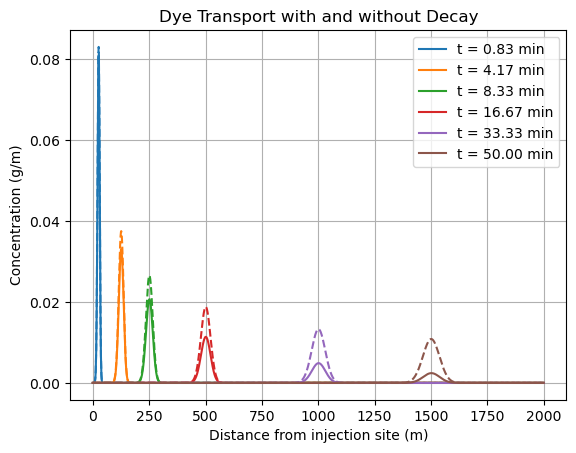

In [50]:
# Parameters
shift = int(100) # Inject at x=shift so that diffusion backwards is still conserved
D = 0.1  # Diffusion coefficient (m^2/s)
v = 0.5  # Advection velocity (m/s)
dx = 1  # Spatial step size (m)
x_min, x_max = 0, 2000+shift*dx  # Spatial domain (measurement site at approx. 1 km)
Nx = int((x_max-x_min) / dx)+1  # Total number of spatial points
T = (x_max-x_min)/v  # Total simulation time (s)
dt = 1  # Time step size (s)
Nt = int(T / dt)+1  # Total number of time steps
lambda_ = 5*10**(-4)  # Decay rate (s^-1)
detection_threshold = 10**(-5)

x = np.linspace(x_min, x_max, Nx)  # Initialise spatial grid

# Initialize concentration arrays for decay model and zero-decay model
u_decay = np.zeros_like(x)  # Decay model
u_zero_decay = np.zeros_like(x)  # Zero-decay model
u_decay[shift] = 1.0 / dx  # Inject 1 gram per meter at x = shift for decay model
u_zero_decay[shift] = 1.0 / dx  # Inject 1 gram per meter at x = 0 for zero-decay model

# Array to store concentration values at the time step after u
u_euler_decay = np.zeros_like(u_decay)
u_euler_zero_decay = np.zeros_like(u_zero_decay)

# Define time steps of interest (seconds) and their corresponding colors
time_steps = [x / (v * dt) for x in [25, 125, 250, 500, 1000, 1500]]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Time-stepping loop to solve the advection-diffusion equation
for n in range(Nt):    
    # Compute concentration at each spatial point at the next timestep for both cases
    for i in range(1, Nx - 1):
        # Decay model: Forward Euler with diffusion, advection, and decay
        u_euler_decay[i] = (u_decay[i] + dt * (D * (u_decay[i + 1] + u_decay[i - 1] - 2 * u_decay[i]) / dx**2
                          - v * (u_decay[i] - u_decay[i - 1]) / dx) - lambda_ * u_decay[i])

        # Zero-decay model: Forward Euler with diffusion and advection only (lambda = 0)
        u_euler_zero_decay[i] = (u_zero_decay[i] + dt * (D * (u_zero_decay[i + 1] + u_zero_decay[i - 1] - 2 * u_zero_decay[i]) / dx**2
                                - v * (u_zero_decay[i] - u_zero_decay[i - 1]) / dx))

    # Boundary conditions
    u_euler_decay[0] = u_euler_zero_decay[0] = 0
    u_euler_decay[-1] = u_euler_zero_decay[-1] = 0

    # Update concentration for the next time step
    u_decay[:] = u_euler_decay[:]
    u_zero_decay[:] = u_euler_zero_decay[:]

    # Plot the concentration profile at specific time steps for both models
    if n in time_steps:
        idx = time_steps.index(n)  # Get the index of the time step
        plt.plot(x[shift:]-np.ones(Nx-shift)*shift*dx, u_decay[shift:], color=colors[idx], label=f't = {n * dt / 60:.2f} min')
        plt.plot(x[shift:]-np.ones(Nx-shift)*shift*dx, u_zero_decay[shift:], '--', color=colors[idx])

# Final plot of dye concentration for both models
plt.title('Dye Transport with and without Decay')
plt.xlabel('Distance from injection site (m)')
plt.ylabel('Concentration (g/m)')
plt.legend()
plt.grid(True)
plt.show()

## Model validation with USGS data

In [433]:
# Parameters
shift = int(100)
D = 0.45  # Diffusion coefficient (m^2/s)
v = 0.22  # Advection velocity (m/s)
dx = 25 # Spatial step size (m)
x_min, x_max = 0, 45000+(shift*dx)  # Spatial domain
Nx = int((x_max-x_min) / dx)+1  # Total number of spatial points
T = (x_max-x_min)/v  # Total simulation time (s)
dt = 15  # Time step size (s)
Nt = int(T / dt)+1  # Total number of time steps

# Decay rate (s^-1)
lambda_ = 1.15*10**(-4)

x = np.linspace(x_min, x_max, Nx)  # Initialise spatial grid
u = np.zeros_like(x)  # Initialise concentration array
u[shift] = 23 / dx  # Initial condition

# Array to store concentration values at the time step after u
u_euler = np.zeros_like(u)

# Measurement stations (distances from the injection site)
stations = [10300, 18340, 26790, 34270]
station_indices = [int(station / dx + shift) for station in stations]

# Initialize variables to store the detection information
max_concentration = {station: 0 for station in stations}
max_conc_time = {station: 0 for station in stations}
detection_start = {station: None for station in stations}
detection_end = {station: None for station in stations}

detection_threshold = 10**(-5)  # Threshold concentration for detection (g/m)

# Time-stepping loop to solve the advection-diffusion equation
for n in range(Nt):
    current_time = n * dt
    
    # Compute concentration at each spatial point at next timestep
    for i in range(1, Nx-1):        
        # Apply the Forward Euler scheme (discretized diffusion, advection, and decay terms)
        u_euler[i] = (u[i] + dt * (D * (u[i+1] + u[i-1] - 2 * u[i]) / dx**2 
                  - v * (u[i] - u[i-1]) / dx) - lambda_ * u[i])

    # Boundary conditions
    u_euler[0] = 0
    u_euler[-1] = 0

    # Update concentration for the next time step
    u[:] = u_euler[:]

    # Check concentrations at measurement stations
    for station, index in zip(stations, station_indices):
        conc = u[index]

        # Record the time and concentration when first detection occurs
        if conc > detection_threshold and detection_start[station] is None:
            detection_start[station] = current_time

        # Record the maximum concentration and time
        if conc > max_concentration[station]:
            max_concentration[station] = conc
            max_conc_time[station] = current_time

        # Record when concentration drops below the detection threshold (end of detection)
        if conc < detection_threshold and detection_start[station] is not None:
            if detection_end[station] is None:
                detection_end[station] = current_time

# Output results for each station
for station in stations:
    detection_start_time = detection_start[station]
    detection_end_time = detection_end[station]
    detection_period = detection_end[station] - detection_start[station]
    peak_conc = max_concentration[station]
    peak_time = max_conc_time[station]

    print(f"Station at {station} meters:")
    print(f"  Maximum concentration: {peak_conc*10**(3):.6f} *10^{-3} g/m at {peak_time/3600:.2f} hours")
    print(f"  First detection time: {detection_start_time / 3600 :.2f} hours")
    print(f"  Detection end time: {detection_end_time / 3600 :.2f} hours")
    print(f"  Length of detection period: {detection_period / 3600 :.2f} hours")
    print()

Station at 10300 meters:
  Maximum concentration: 12.438710 *10^-3 g/m at 12.98 hours
  First detection time: 10.71 hours
  Detection end time: 15.63 hours
  Length of detection period: 4.92 hours

Station at 18340 meters:
  Maximum concentration: 7.051434 *10^-3 g/m at 23.10 hours
  First detection time: 20.14 hours
  Detection end time: 26.42 hours
  Length of detection period: 6.28 hours

Station at 26790 meters:
  Maximum concentration: 4.346229 *10^-3 g/m at 33.76 hours
  First detection time: 30.27 hours
  Detection end time: 37.58 hours
  Length of detection period: 7.31 hours

Station at 34270 meters:
  Maximum concentration: 2.961921 *10^-3 g/m at 43.19 hours
  First detection time: 39.34 hours
  Detection end time: 47.35 hours
  Length of detection period: 8.00 hours



Expected results (data from USGS study):

| Distance from injection point (km) | Peak concentration (×10^-3 grams/m³) | First detection time (h) | Peak time (h) | Last detection time (h) | Time of passage (h) |
|------------------------------------|--------------------------------------|---------------------------|----------------|--------------------------|----------------------|
| 10.3                               | 12.4                                 | 11.5                      | 12.5           | 16.4                     | 4.9                  |
| 18.34                              | 6.82                                 | 20.5                      | 23             | 30.9                     | 10.4                 |
| 26.79                              | 4.19                                 | 29                        | 34             | 42.9                     | 13.9                 |
| 34.27                              | 2.91                                 | 38                        | 43.5           | 54.2                     | 16.2                 |


## Analysis questions

In [13]:
# Parameters
D = 0.1  # Diffusion coefficient (m^2/s)
v = 0.5  # Advection velocity (m/s)
x_min, x_max = 0, 2000  # Spatial domain (measurement site at approx. 1 km)
dx = 1 # Spatial step size (m)
Nx = int((x_max-x_min) / dx)+1  # Total number of spatial points
T = (x_max-x_min)/v  # Total simulation time (s)
dt = 1  # Time step size (s)
Nt = int(T / dt)+1  # Total number of time steps

# Decay rate (s^-1)
# lambda_ = 0
lambda_ = 5*10**(-4)
print(f"lambda={lambda_}")

x = np.linspace(x_min, x_max, Nx)  # Initialise spatial grid
u = np.zeros_like(x)  # Initialise concentration array
u[0] = 1.0 / dx  # Inject 1 gram per meter at x = 0 (initial condition)

# Array to store concentration values at the time step after u
u_euler = np.zeros_like(u)

# Measurement stations (distances from the injection site)
stations = [500, 1000, 1500]
station_indices = [int(station / dx) for station in stations]

# Initialize variables to store the detection information
max_concentration = {station: 0 for station in stations}
max_conc_time = {station: 0 for station in stations}
detection_start = {station: None for station in stations}
detection_end = {station: None for station in stations}
conc_99pct_end = {station: None for station in stations}

detection_threshold = 10**(-5)  # Threshold concentration for detection (g/m)

# Time-stepping loop to solve the advection-diffusion equation
for n in range(Nt):
    current_time = n * dt
    
    # Compute concentration at each spatial point at next timestep
    for i in range(1, Nx-1):
        # Apply the Forward Euler scheme (discretized diffusion, advection, and decay terms)
        u_euler[i] = (u[i] + dt * (D * (u[i+1] + u[i-1] - 2 * u[i]) / dx**2 
                  - v * (u[i] - u[i-1]) / dx) - lambda_ * u[i])

    # Boundary conditions
    u_euler[0] = 0
    u_euler[-1] = 0

    # Update concentration for the next time step
    u[:] = u_euler[:]

    # Check concentrations at measurement stations
    for station, index in zip(stations, station_indices):
        conc = u[index]

        # Record the time and concentration when first detection occurs
        if conc > detection_threshold and detection_start[station] is None:
            detection_start[station] = current_time

        # Record the maximum concentration and time
        if conc > max_concentration[station]:
            max_concentration[station] = conc
            max_conc_time[station] = current_time

        # Record when concentration drops below the detection threshold (end of detection)
        if conc < detection_threshold and detection_start[station] is not None:
            if detection_end[station] is None:
                detection_end[station] = current_time

        # Track when concentration drops below 99% of the peak after reaching the peak
        if max_concentration[station] > 0:  # Ensure there's a valid peak
            conc_99pct = 0.99 * max_concentration[station]

            # Check for the first time concentration drops below 99% of the peak after the peak
            if conc < conc_99pct and current_time > max_conc_time[station] and conc_99pct_end[station] is None:
                conc_99pct_end[station] = current_time

# Output results for each station
for station in stations:
    detection_start_time = detection_start[station]
    detection_end_time = detection_end[station]
    detection_period = detection_end[station] - detection_start[station]
    peak_conc = max_concentration[station]
    peak_time = max_conc_time[station]
    conc_99pct_end_time = conc_99pct_end[station]

    print(f"Station at {station} meters:")
    print(f"  Maximum concentration: {peak_conc:.6f} g/m at {peak_time/60:.2f} minutes")
    print(f"  First detection time: {detection_start_time / 60 :.2f} minutes")
    print(f"  Detection end time: {detection_end_time / 60 :.2f} minutes")
    print(f"  Length of detection period: {detection_period / 60 :.2f} minutes")
    print(f"  Length of period when concentration is within 99% of peak: {(conc_99pct_end_time-peak_time)*2:.0f} seconds")
    print()

lambda=0.0005
Station at 500 meters:
  Maximum concentration: 0.005735 g/m at 16.57 minutes
  First detection time: 14.30 minutes
  Detection end time: 19.33 minutes
  Length of detection period: 5.03 minutes
  Length of period when concentration is within 99% of peak: 14 seconds

Station at 1000 meters:
  Maximum concentration: 0.002457 g/m at 33.22 minutes
  First detection time: 30.12 minutes
  Detection end time: 36.73 minutes
  Length of detection period: 6.62 minutes
  Length of period when concentration is within 99% of peak: 18 seconds

Station at 1500 meters:
  Maximum concentration: 0.001217 g/m at 49.85 minutes
  First detection time: 46.27 minutes
  Detection end time: 53.83 minutes
  Length of detection period: 7.57 minutes
  Length of period when concentration is within 99% of peak: 22 seconds



### Graphing times of passage at various station locations

Distance: 500 meters
  With Decay - First detection: 14.30 min, Last detection: 19.32 min, Detection length: 5.02 min
  Without Decay - First detection: 14.23 min, Last detection: 19.47 min, Detection length: 5.23 min

Distance: 750 meters
  With Decay - First detection: 22.15 min, Last detection: 28.07 min, Detection length: 5.92 min
  Without Decay - First detection: 22.03 min, Last detection: 28.32 min, Detection length: 6.28 min

Distance: 1000 meters
  With Decay - First detection: 30.12 min, Last detection: 36.72 min, Detection length: 6.60 min
  Without Decay - First detection: 29.90 min, Last detection: 37.10 min, Detection length: 7.20 min

Distance: 1250 meters
  With Decay - First detection: 38.17 min, Last detection: 45.30 min, Detection length: 7.13 min
  Without Decay - First detection: 37.85 min, Last detection: 45.82 min, Detection length: 7.97 min

Distance: 1500 meters
  With Decay - First detection: 46.27 min, Last detection: 53.82 min, Detection length: 7.55 min
  W

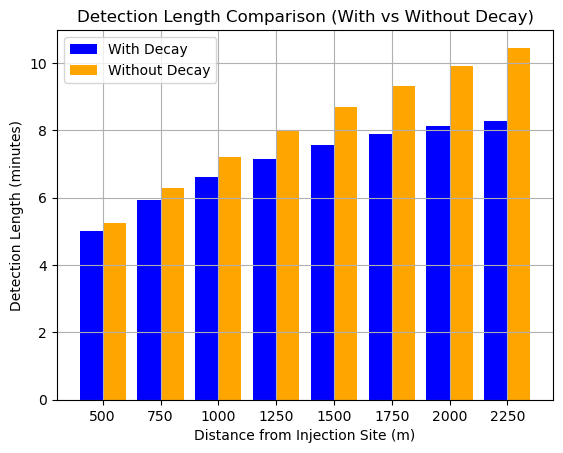

In [52]:
# Parameters
D = 0.1  # Diffusion coefficient (m^2/s)
v = 0.5  # Advection velocity (m/s)
x_min, x_max = 0, 2500  # Spatial domain (injection site at approx. 1 km)
dx = 1  # Spatial step size (m)
Nx = int((x_max - x_min) / dx)  # Total number of spatial points
T = Nx / v  # Total simulation time (s)
dt = 1  # Time step size (s)
Nt = int(T / dt)  # Total number of time steps
lambda_with_decay = 5 * 10**(-4)  # Decay rate (s^-1)
lambda_without_decay = 0  # No decay
fluorometer_threshold = 1e-5  # Fluorometer sensitivity (g/m)

# Measurement station locations (in meters)
measurement_distances = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250]  # Only considering 500, 1000, and 1500 meters
measurement_indices = [int(distance / dx) for distance in measurement_distances]

# Function to simulate the advection-diffusion equation
def simulate(lambda_decay):
    # Initialise spatial grid and concentration array
    x = np.linspace(x_min, x_max, Nx)
    u = np.zeros_like(x)
    u[0] = 1.0 / dx  # Inject 1 gram per meter at x = 0

    # Array to store concentration values at the next time step
    u_euler = np.zeros_like(u)

    # Dictionary to store detection times for each measurement location
    detection_times = {distance: {'first': None, 'last': None} for distance in measurement_distances}

    # Time-stepping loop to solve the advection-diffusion equation
    for n in range(Nt):
        # Compute concentration at each spatial point at the next timestep
        for i in range(1, Nx - 1):
            u_euler[i] = (u[i] + dt * (D * (u[i + 1] + u[i - 1] - 2 * u[i]) / dx**2
                      - v * (u[i] - u[i - 1]) / dx) - lambda_decay * u[i])

        # Boundary conditions
        u_euler[0] = 0
        u_euler[-1] = 0

        # Update concentration for the next time step
        u[:] = u_euler[:]

        # Check detection for each measurement station
        for distance, index in zip(measurement_distances, measurement_indices):
            if u[index] > fluorometer_threshold:
                # Record first detection time if not yet recorded
                if detection_times[distance]['first'] is None:
                    detection_times[distance]['first'] = n * dt
                # Continuously update the last detection time
                detection_times[distance]['last'] = n * dt

    # Convert times from seconds to minutes for easier interpretation
    for distance in measurement_distances:
        if detection_times[distance]['first'] is not None:
            detection_times[distance]['first'] /= 60  # Convert to minutes
        if detection_times[distance]['last'] is not None:
            detection_times[distance]['last'] /= 60  # Convert to minutes

    return detection_times

# Simulate for both cases: with decay and without decay
detection_times_with_decay = simulate(lambda_with_decay)
detection_times_without_decay = simulate(lambda_without_decay)

# Filter out locations where there was no detection
filtered_with_decay = {distance: times for distance, times in detection_times_with_decay.items()
                       if times['first'] is not None and times['last'] is not None}

filtered_without_decay = {distance: times for distance, times in detection_times_without_decay.items()
                          if times['first'] is not None and times['last'] is not None}

# Compute detection lengths (difference between last and first detection)
detection_lengths_with_decay = {}
detection_lengths_without_decay = {}

# Display first detection, last detection, and detection lengths for both cases
for distance in measurement_distances:
    print(f"Distance: {distance} meters")
    
    if distance in filtered_with_decay:
        first_with_decay = filtered_with_decay[distance]['first']
        last_with_decay = filtered_with_decay[distance]['last']
        length_with_decay = last_with_decay - first_with_decay
        detection_lengths_with_decay[distance] = length_with_decay
        print(f"  With Decay - First detection: {first_with_decay:.2f} min, "
              f"Last detection: {last_with_decay:.2f} min, Detection length: {length_with_decay:.2f} min")
    else:
        print(f"  With Decay - No detection")

    if distance in filtered_without_decay:
        first_without_decay = filtered_without_decay[distance]['first']
        last_without_decay = filtered_without_decay[distance]['last']
        length_without_decay = last_without_decay - first_without_decay
        detection_lengths_without_decay[distance] = length_without_decay
        print(f"  Without Decay - First detection: {first_without_decay:.2f} min, "
              f"Last detection: {last_without_decay:.2f} min, Detection length: {length_without_decay:.2f} min")
    else:
        print(f"  Without Decay - No detection")

    print()  # Blank line between results

# Plot comparison of detection lengths for each distance
distances_to_plot = list(detection_lengths_with_decay.keys())  # Only distances with valid data
with_decay_lengths = [detection_lengths_with_decay[d] for d in distances_to_plot]
without_decay_lengths = [detection_lengths_without_decay[d] for d in distances_to_plot]

x_ticks = np.arange(len(distances_to_plot))

plt.bar(x_ticks - 0.2, with_decay_lengths, width=0.4, label='With Decay', color='blue')
plt.bar(x_ticks + 0.2, without_decay_lengths, width=0.4, label='Without Decay', color='orange')

plt.xticks(x_ticks, distances_to_plot)
plt.xlabel('Distance from Injection Site (m)')
plt.ylabel('Detection Length (minutes)')
plt.title('Detection Length Comparison (With vs Without Decay)')
plt.legend()
plt.grid(True)
plt.show()

### Graphing sampling frequency

Maximum concentration (continuous): 0.00245701 g/m
Maximum concentration (sampled every 15 minutes): 0.00245543 g/m


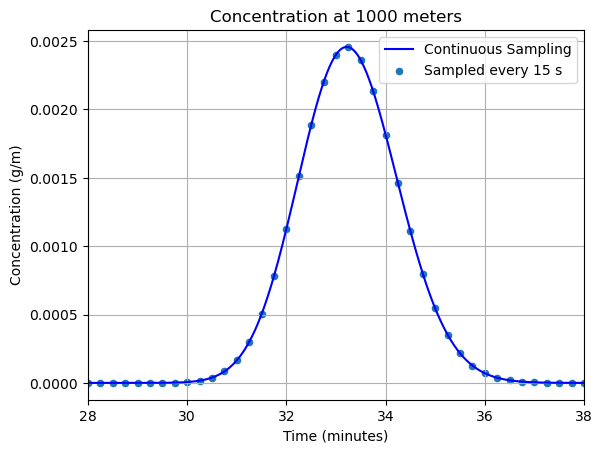

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 0.1  # Diffusion coefficient (m^2/s)
v = 0.5  # Advection velocity (m/s)
x_min, x_max = 0, 2000  # Spatial domain: 0-2000m (injection site at approx. 1 km)
dx = 1  # Spatial step size (m)
Nx = int((x_max - x_min) / dx)  # Total number of spatial points
T = Nx / v  # Total simulation time (s)
dt = 1  # Time step size (s)
Nt = int(T / dt)  # Total number of time steps
lambda_ = 5 * 10**(-4)  # Decay rate (s^-1) (can be set to 0 for no decay)
fluorometer_threshold = 1e-5  # Fluorometer sensitivity (g/m)

# Measurement station (1000 meters from the injection site)
measurement_distance = 1000
measurement_index = int(measurement_distance / dx)

# Initialise spatial grid and concentration array
x = np.linspace(x_min, x_max, Nx)
u = np.zeros_like(x)
u[0] = 1.0 / dx  # Inject 1 gram per meter at x = 0

# Array to store concentration values at the next time step
u_euler = np.zeros_like(u)

# List to track concentration at the measurement station over time
concentrations = []

# Time-stepping loop to solve the advection-diffusion equation
for n in range(Nt):
    # Compute concentration at each spatial point at the next timestep
    for i in range(1, Nx - 1):
        u_euler[i] = (u[i] + dt * (D * (u[i + 1] + u[i - 1] - 2 * u[i]) / dx**2
                  - v * (u[i] - u[i - 1]) / dx) - lambda_ * u[i])

    # Boundary conditions
    u_euler[0] = 0
    u_euler[-1] = 0

    # Update concentration for the next time step
    u[:] = u_euler[:]

    # Track concentration at the measurement station
    concentrations.append(u[measurement_index])

# Convert concentrations to numpy array for easier manipulation
concentrations = np.array(concentrations)

# Get the maximum concentration from continuous sampling
max_concentration_continuous = np.max(concentrations)

# Define sampling intervals in minutes and corresponding time steps
sampling_intervals = [15]  # In seconds
sampling_steps = [int(interval / dt) for interval in sampling_intervals]

# Store max concentration for each sampling interval
max_concentrations_sampled = {}

# Simulate sampling for each interval
for interval, step in zip(sampling_intervals, sampling_steps):
    sampled_concentrations = concentrations[::step]  # Sample every 'step' time steps
    max_concentration_sampled = np.max(sampled_concentrations)
    max_concentrations_sampled[interval] = max_concentration_sampled

# Display the results
print(f"Maximum concentration (continuous): {max_concentration_continuous:.8f} g/m")
for interval in sampling_intervals:
    print(f"Maximum concentration (sampled every {interval} minutes): {max_concentrations_sampled[interval]:.8f} g/m")

# Plot the concentration profile over time and the sampled points
time = np.arange(Nt) * dt / 60  # Time in minutes

plt.plot(time, concentrations, label="Continuous Sampling", color="blue")

for interval, step in zip(sampling_intervals, sampling_steps):
    sampled_times = time[::step]
    sampled_concentrations = concentrations[::step]
    plt.scatter(sampled_times, sampled_concentrations, label=f"Sampled every {interval:.0f} s", s=20)

plt.xlabel('Time (minutes)')
plt.ylabel('Concentration (g/m)')
plt.title(f'Concentration at {measurement_distance} meters')
plt.legend()
plt.xlim(28,38)
plt.grid(True)
plt.show()

### Finding max distance where dye is still detectable

In [19]:
# Parameters
shift = int(100)
D = 0.1  # Diffusion coefficient (m^2/s)
v = 0.5  # Advection velocity (m/s)
x_min, x_max = 0, 15000+shift  # Spatial domain
dx = 5  # Spatial step size (m)
Nx = int((x_max - x_min) / dx) + 1  # Total number of spatial points
T = (x_max - x_min) / v  # Total simulation time (s)
dt = 1  # Time step size (s)
Nt = int(T / dt) + 1  # Total number of time steps
lambda_ = 10**(-4)  # Decay rate (s^-1)
detection_threshold = 10**(-5)  # Threshold for detectability

x = np.linspace(x_min, x_max, Nx)  # Initialise spatial grid
u = np.zeros_like(x)  # Initialise concentration array
u[shift] = 1 / dx  # Inject 1 gram per meter at x = 0 (initial condition)

# Array to store concentration values at the time step after u
u_euler = np.zeros_like(u)

# Variable to store the last detectable time
last_detectable_time = None

# Time-stepping loop to solve the advection-diffusion equation
for n in range(Nt):
    # Compute concentration at each spatial point at next timestep
    for i in range(1, Nx-1):
        # Apply the Forward Euler scheme (discretized diffusion, advection, and decay terms)
        u_euler[i] = (u[i] + dt * (D * (u[i+1] + u[i-1] - 2 * u[i]) / dx**2
                    - v * (u[i] - u[i-1]) / dx) - lambda_ * u[i])
    
    # Boundary conditions
    u_euler[0] = 0
    u_euler[-1] = 0
        
    # Update concentration for the next time step
    u[:] = u_euler[:]

    # Check if the peak of the concentration profile is detectable
    if np.max(u) >= detection_threshold:
        last_detectable_time = n * dt  # Store the last time the peak is detectable
        last_detectable_distance = (np.argmax(u)-shift)*dx
        max_conc = np.max(u)

# Output the last time when the peak was detectable
if last_detectable_time is not None:
    print(f"After injection the last time the dye is detectable is at t = {last_detectable_time / 60:.2f} minutes, x = {last_detectable_distance}, with concentration = {max_conc}.")

After injection the last time the dye is detectable is at t = 503.33 minutes, x = 14590, with concentration = 1.2123220448257563e-05.


## 2D model - incorporating slower decay rates at larger depths

Graph of UV penetration vs depth in water looks like an exponential decay curve: https://aslopubs.onlinelibrary.wiley.com/doi/pdf/10.4319/lo.1989.34.8.1623, p.5.

Diffuse attenuation coefficient cited to be approx. between 0.152/m and 0.557/m:
https://www.sciencedirect.com/science/article/pii/S0272771404001234

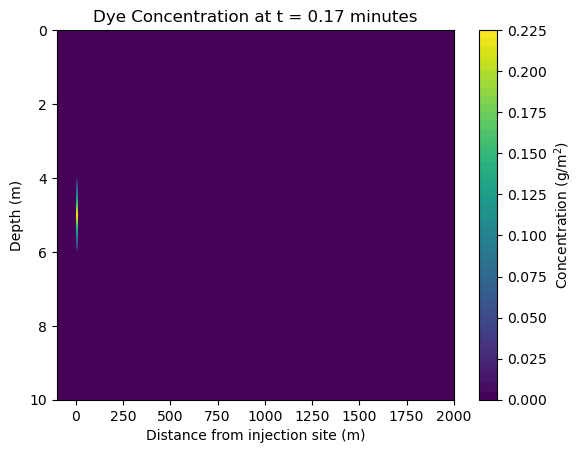

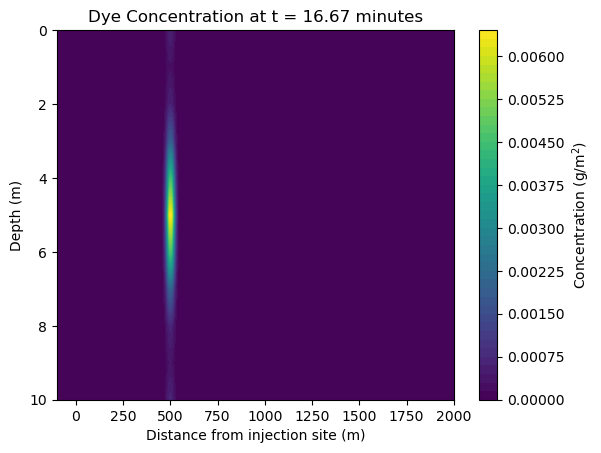

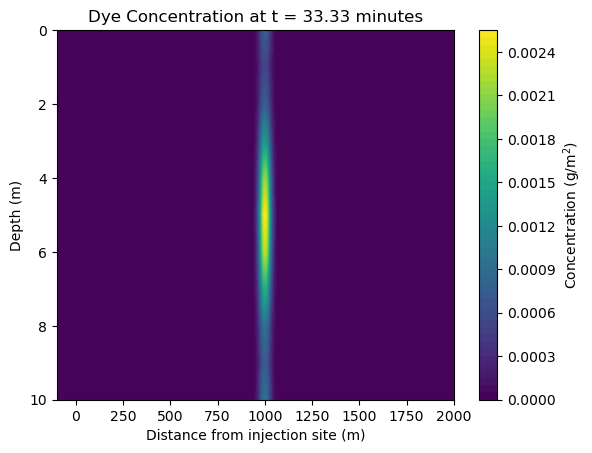

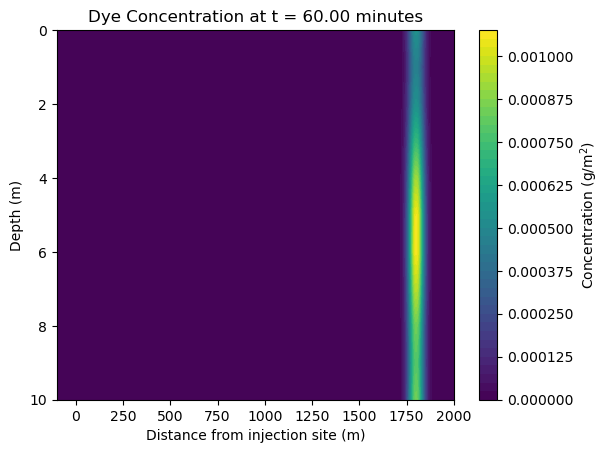

In [21]:
# Parameters
shift = int(100)
D = 10**(-3)  # Diffusion coefficient (same in x-direction as in z-direction) (m^2/s)
v = 0.5  # Advection velocity (m/s)
dx = 1  # Spatial step size (m) in x-direction
dz = 1  # Spatial step size (m) in z-direction
x_min, x_max = 0, 2000+shift*dx  # Spatial domain: 0-2000m (x-direction)
z_min, z_max = 0, 10  # Depth domain: 0-10m (z-direction)
Nx = int((x_max - x_min) / dx)+1  # Total number of spatial points in x
Nz = int((z_max - z_min) / dz)+1  # Total number of spatial points in z
T = Nx / v  # Total simulation time (s)
dt = 1  # Time step size (s)
Nt = int(T / dt)+1  # Total number of time steps

# Initialize spatial grids for x and z
x = np.linspace(x_min, x_max, Nx)  # x spatial grid
z = np.linspace(z_min, z_max, Nz)  # z depth grid

# Decay rate (lambda) varies with depth
# lambda_z = 10**(-8) * np.exp(-z)
lambda_z = 5*10**(-4) * np.exp(-z/5)

# Initialize concentration array
u = np.zeros((Nx, Nz))  # 2D array for concentration: u[x][z]
u[shift, 5] = 1 / (dx * dz)  # Inject 1 gram per meter square at x = 10 and all depths (start a bit further down to ensure diffusion backwards)

# Array to store concentration values at the next time step
u_euler = np.zeros_like(u)

# Time-stepping loop to solve the advection-diffusion equation
for n in range(Nt):
    current_time = n * dt
    
    # Compute concentration at each spatial point at the next timestep
    for i in range(1, Nx-1):
        for j in range(1, Nz-1):
            # Apply the Forward Euler scheme with diffusion in both x and z, advection in x, and depth-varying decay
            u_euler[i, j] = (
                u[i, j] + 
                dt * (

                # Diffusion using 9-point stencil
                D * ((4 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1]) + u[i+1, j+1] + u[i+1, j-1] + u[i-1, j+1] + u[i-1, j-1] - 20 * u[i, j]) / (6 * dx**2)) -

                # Diffusion in x-direction and z-direction (same as 5-point stencil to approximate the Laplacian)             
                # D * (u[i+1, j] + u[i-1, j] - 2 * u[i, j]) / dx**2 +
                # D * (u[i, j+1] + u[i, j-1] - 2 * u[i, j]) / dz**2 -
                
                # Advection in x-direction (unchanged)
                v * (u[i, j] - u[i-1, j]) / dx
                ) -
                # Decay (varying with depth z)
                lambda_z[j] * u[i, j]
            )
        
    # Dirichlet boundary conditions: zero concentration at boundaries in the x-direction
    u_euler[0, :] = np.zeros(Nz)    # x = 0
    u_euler[-1, :] = np.zeros(Nz)   # x = max
    
    # Neumann boundary conditions at the top and bottom (z-direction)
    u_euler[:, 0] = u_euler[:, 2]   # Neumann at z = 0 (bottom)
    u_euler[:, -1] = u_euler[:, -3] # Neumann at z = max (top)

    # Update concentration for the next time step
    u[:] = u_euler[:]

    # Plot the concentration profile at specific time steps
    if n in [int((x) / (v*dt)) for x in [5, 500, 1000, 1800]]:
        plt.figure()
        plt.contourf((x-np.ones(Nx)*shift*dx), z, u.T, levels=50)
        plt.colorbar(label=r'Concentration (g/m$^2$)')
        plt.title(f'Dye Concentration at t = {n * dt / 60:.2f} minutes')
        plt.xlabel('Distance from injection site (m)')
        plt.ylabel('Depth (m)')
        plt.gca().invert_yaxis()  # Invert the y-axis to show depth from 0 at the top to max depth at the bottom
        plt.show()